# Распределение Пуассона
Poisson Distribution

Как уже было сказанно существует множество распределений вероятностей, используемых для представления практически любого случайного события. Ранее мы познакомились с биномильным распределением для представления событий с дискретными величинами. Binom

А также нормальном распределении используемым для непрерывных числовый значений. Norm

Распределение Пуассона - это еще одно распространенное распределение, которое используется для описания кол-ва появления определенного события в течении фиксированного временного или пространственного интервала.

Например: Подобное распределение можно использовать для описания кол-ва автомобилей, проезжающих через определенный перекресток между 4 и 5 часами вечера в определенный день. Его также можно использовать для описания кол-ва звонков, полученных в офисе между часом и тремя часами для в определенный день.

Распределение Пуассона определяется параметром скорости, которую обозначают греческой буквой **лямбда**

**Лямбда** представляет собой ожидаемое значение - или среднее значение - распределения. Например, если наше ожидаемое число клиентов между 13:00 и 14:00 равно 7, то мы установим параметр для распределения Пуассона равным 7. PMF (Probability Mass Function) для распределения Пуассона будет выглядеть следующим образом 

![Poisson Distribution](Poisson%20distribution.png)

Чем выше значение **лямбда** тем выше дисперсия (разброс) возможных значений

## Расчет вероятности точных значений с использованием PMF

Для расчета вероятности по распределению Пуассона используется PMF (Probability Mass Functions)

Который находится в модуле poisson библиотеки scipy.stats

Например предположим что мы ожидаем что в течении следующих 30 дней будет идти дождь 10 раз, получается что лямбда равна 10.

Мы можем рассчитать вероятность дождя на 6 день учитывая лямбду 10

In [17]:
# импортируем библиотеку
import scipy.stats as stats

print(stats.poisson.pmf(6, 10))

0.06305545800345125


Как и в предыдущей функции вероятностной массы дискретных случайных величин, отдельные вероятности можно суммировать, чтобы найти вероятность наблюдения значения в некотром диапазоне.

Например, если мы ожидаем, что в течение следующих 30 дней будет 10 дождей, то кол-во дождей в течении следующих 30 дней будет распределено по закону Пуассона с **лямбда** = 10. Мы можем рассчитать вероятность дождя в период с 12 по 14 дни следующим образом.

In [18]:
# импортируем библиотеку
import scipy.stats as stats

print(stats.poisson.pmf(12, 10) + stats.poisson.pmf(13, 10) + stats.poisson.pmf(14, 10))

# Таким образом вероятность дождя в период с 12 по 14 дней равна 21.9%

0.21976538076223123


## Расчет вероятностей диапазона с использование CDF (Cumulative Distribution Function)

Мы можем использовать poisson.cdf() метод, scipy.stats библиотеки для оценки вероятности наблюдения определенного числа или меньше, учитывая ожидаемое значение распределения.

Например если мы хотим рассчитать вероятность наблюдения 6 или меньше дождевых дней в течении следующих 30 дней, когда мы ожидали 10, мы могли бы сделать следующее

In [4]:
import scipy.stats as stats

print(stats.poisson.cdf(6, 10))

# Получается что вероятность дождливых дней от 0 до 6 при ожидаемых 10 равна 13% 

0.13014142088248304


Также как и в предыдущих функциях мы можем производить математические действия с вероятности для вычисления вероятности в диапазоне

In [6]:
print(1 - stats.poisson.cdf(11, 10))

# Таким образом получили что с вероятностью 30% осадки выпадут кол-ом в диапазоне от 12 до 30 дней
# Также для расчета вероятности что осадки в течении 30 дней будут в кол-ве дипазона от 12 до 18 раз

print(stats.poisson.cdf(18, 10) - stats.poisson.cdf(11, 10))

# Вероятность выавдения осадков в кол-ве от 12 до 18 раз за 30 дней равна 29.6%

0.30322385369689386
0.29603734909303947


## Ожидание распределение Пуассона

Как уже говорилось ранее распределение Пуассона используется параметр называемый лямбой что по сути своей обозначает ожидаемое значение (или среднее).

Давайте более подробно рассмотрим данное понятие на примере.

Предположим что мы продавцы, и после многих недель работы мы выявили что наш средний показатель составляет 10 продаж в неделю. Если мы возьмем данное значение в качестве ожидаемого значения распределения Пуассона, функция массы вероятности будет иметь вид.

![lambda example](poisson%20destribution%20labda%20measuring.png)

Самый высокий столбец на диаграмме представляет значение с наибольшей вероятностью возникновения. В данном случае самый высокий столбец равен 10. Однако это не говорит нам о 100% вероятности мы сделаем 10 продаж. Это означает что в среднем по всем неделям мы ожидаем, что наше среднее значение будет равно примерно 10 продажам за неделю.

Давайте рассмотрим ситуацию с другой стороны. Возьмем выборку из 1000 случайных значений из распределения Пуассона с ожидаемым значением 10. Для этого мы можем использоваться метод rvs() библиотеки scipy.stats используемый для генерации случайных значений

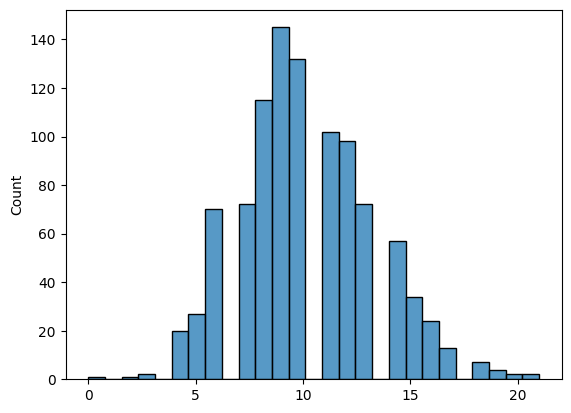

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

rvs = stats.poisson.rvs(10, size = 1000)
sns.histplot(rvs)
plt.show()
plt.close()

Таким образом можно заметить что наибольшие значения находятся очень близко к 10

И если мы возьмем среднее значение переменной RVS то получим

In [13]:
print(rvs.mean())
# Значение приближенное к 10

10.123


## Итог
Таким образом когда мы говорим об ожидаемом значении, мы имеем ввиду среднее значение по многим наблюдениям. Это связанно с законом больших чисел: чем больше у нас образцов, тем больше вероятность, что образцы будут напоминать истинную совокупность, а среднее значение образцов будет приближаться к ожидаемому значению. Таким образом даже если продавец может сделать 3 продажи в одну неделю, он может сделать 16 в следующую и 11 через неделю. В долгосрочной перспективе, после многих недель, ожидаемое значение (или среднее) все еще будет равно 10.

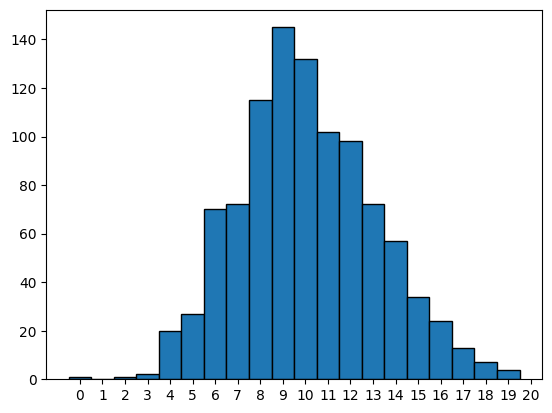

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

plt.hist(rvs, bins=np.arange(len(set(rvs)))-0.5, edgecolor='black')
plt.xticks(list(range(rvs.max())))
plt.show()

## Распространение распределение Пуассона
Распределение вероятностей также имеют вычисляемые отклонения.

Отклонения это способ измерить распространение или дисперсию значений и вероятность в распределении.

Для распределения Пуассона, отклонением является лямбда, которая обозначает ожидаемое значение и отклонение является эквивалентом в распределении Пуассона.

Мы знаем что распределение Пуассона имеет дискретные случайные величины которые должны быть больше 0, таким образом если ожидаемое значение растет, кол-во возможных значений распределений также будет расти.

График отображаемый ниже показывает распределение Пуассона с лямбдой равной 3, а следующий за ним график показывает распределение Пуассона с лямбой равной 15.

Можно заметить что распределение выросло. Также обратите внимание что высота столбца на втором графике уменьшился хоть и увеличилось кол-во возможных значений в распределении.

![1 Graph](1%20graph.png)

![2 Graph](2%20graph.png)

Мы можем расчитать отклонение используя метод var библиотеки np

In [19]:
import scipy.stats as stats
import numpy as np

rvs_rand = stats.poisson.rvs(4, size=1000)
print(np.var(rvs_rand))

4.021071


По причине того что расчты производились из набора, это вполне реально что отклонение не будет абсолютно равен лямбде.

Другой способ чтобы посмотреть рост возможных значений это посмотреть на диапазон набора (минимальное и максимальное значение в множестве). Следующий набор содержит 1000 случайных значений в распределении Пуассона с лямбдой равно 4. Давайте отобразим максимальное и минимальное значение

In [23]:
rvs_rand = stats.poisson.rvs(4, size=1000)
print(rvs_rand.min(), rvs_rand.max())

# Проделаем тоже с самой с лямбой равной 10
rvs_rand = stats.poisson.rvs(10, size=1000)
print(rvs_rand.min(), rvs_rand.max())

0 13
1 24
